# Python data analysis tutorial

Hi! Thanks for coming! Let's dig in!

## Some preliminaries:

Hopefully everyone has followed the installation instructions [here](https://github.com/drussellmrichie/uconn_jterm_python_workshops) (most critical for today were the instructions in step 1). Everything I'll be working with is in the `python-data-analysis` folder of the repo, so hopefully you have downloaded the entire repo as well. If you have not completed those steps for whatever reason, it'd be better if we didn't spend too much time today troubleshooting those issues. But show of hands -- who hasn't done both of these steps?

If your machine is not totally setup to follow today's tutorial, just follow along with a partner and/or watch my projection. And after today, I'd be happy to get you setup on your own computer.

**We're covering a lot of tools that could each probably fill hours of tutorial. The goal this session is not to give you complete command of them, but to give you very basic facility with them, and more importantly, a taste of what you can do, and give you motivation and means to learn further.**

If something isn't clear, do feel free to ask questions (although sometimes I'll explicitly say that understanding a particular code chunk isn't very important). And of course, I am happy to field questions about Python-related things after today,  for both things that I speed through and those that I spend more time on!

In this session, everything will be taught and demonstrated in a...

## [Jupyter notebook](https://jupyter.org/)

...which is a web application that allows you to create and share documents that contain explanatory text (in markdown syntax, like HTML), live (Python) code and code output...

In [1]:
word = 'Maude and June'
for letter in word:
    #print((' ' + letter) * len(word))
    print(letter)

M
a
u
d
e
 
a
n
d
 
J
u
n
e


...equations...

$$x_{1,2} = \frac{-b \pm \sqrt{b^2-4ac}}{2b}.$$

...and visualizations produced by Python code. A quick note about that:

Today I'll be working in a dark Jupyter Notebook theme, which I acquired by using the package I mentioned on this notebook's github repo (and linked [here](https://github.com/dunovank/jupyter-themes)). If you want to work in the default, pretty bright theme, it looks like this:

![](https://docs.microsoft.com/en-us/azure/virtual-machines/media/virtual-machines-linux-jupyter-notebook/ipy-notebook-spectral.png)

To accommodate the dark Jupyter theme, I am also modifying the default style for `seaborn`, the visualization package we'll use, to make plots that look legible on this darker background. If you are working in the default theme, you don't need to run the `set_style` chunk below (you can comment it out).

In [2]:
# import some stuff we'll work with today, and what we'll need right now to demonstrate the
# seaborn styling I'm alluding to

import pandas as pd
import seaborn as sns
import numpy as np
"""
In case we haven't gone over numpy yet, it's another major scientific package, largely for
numerical computing. A lot of pandas is actually numpy "under the hood". We'll only barely use 
it, but you'll probably eventually tangle with it if you do scientific computing with Python.
"""

import matplotlib
#matplotlib.style.use('ggplot')

# if you want the default, bright seaborn style, comment out with # or """""" the chunk below
sns.set_style({  'axes.facecolor': 'gray',
                 'axes.labelcolor': 'white',
                 'figure.facecolor': 'gray',
                 'grid.color': '.8',
                 'image.cmap': u'Greys',
                 'text.color': 'white',
                 'xtick.color': 'white',
                 'ytick.color': 'white'})

%matplotlib inline

We'll quickly contrast this modified seaborn style with the default by loading a dataset that comes with `seaborn`, a dataset of restaurant tipping. (So this is a section where understanding the code examples isn't critical.)

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


And so we'll just try to make barplot of tips, broken down by tippers' gender and smoker status.

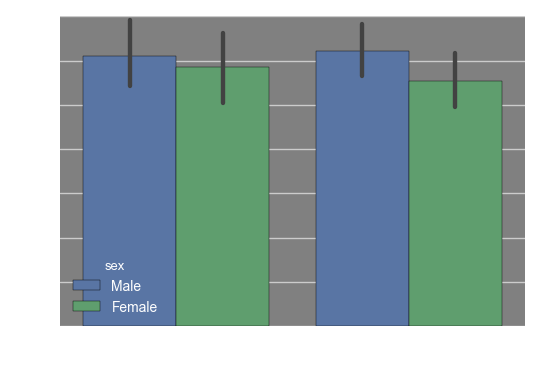

In [4]:
sns.barplot(x='smoker',y='tip',hue='sex',data=tips);

Again, if you are working in the default seaborn style, you should see something like the below (these are plots of different data, but that's not important):

![](http://seaborn.pydata.org/_images/factorplot_bars.png)

For the rest of tutorial, I'll just be using the dark style I set up, and with just one exception towards the end, I won't bring up any really bright images.

So those are the main capabilities of the notebook. When would you use that?
    - Teaching and demonstration (like now...)
    - Exploratory data analysis (most of my current work for my dissertation)
    - Producing a well-documented, shareable, reproducible data analysis pipeline
    
#### Basically, #openscience.

A little more on that last bullet: if you were to try to do some of the data analysis things you can do in Python, in another program, you'd probably use something like Excel. Sometimes Excel does suffice. But, one problem with Excel is that *it doesn't make transparent the process by which you obtained your final data analysis product*. Usually you just end up with a single, static spreadsheet with, e.g., a scatterplot with a regression equation and line, and it'll often not be clear to someone looking at that spreadsheet *how you got there* (unless they were already extensively familiar with your project).

*Jupyter notebooks, and other documents like them, present a linear process that makes it clear how you got from raw data to your final analyses.*

For more on the virtues of Jupyter Notebooks (formerly called IPython Noteboks): read [this Nature article/op-ed](http://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261).

### Using the jupyter notebook

Working on a jupyter notebook is basically all about making 'cells', the chunks with markdown or code, and running them, moving them, etc.

Make a couple cells now, at least one with code and one with markdown, and run them. (Maybe also explore the toolbar and see what else you can do -- cut/paste/split/merge/run-all-above).

In [5]:
# a code cell, maybe?
print("hi")

hi


In [6]:
# maybe you could change this to a markdown cell?

# you could merge this with the cell above, why not?

## Data analysis

If you do data analysis in Python, your workhorse will be:

### Pandas
A summary of [*pandas*](http://pandas.pydata.org/) from its documentation:

> pandas is an open source...library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

The basic datastructures of `pandas` are `Series` and, more importantly, `DataFrames`. 

A `Series` is sort of like a list -- it's a sequence of items -- but it has labels on each of the items, and it has special attributes and methods available to it. (If this is abstract now, it will become more concrete in a moment!)

A `DataFrame` is basically a data table, with labeled rows and columns. Often, each row will be a participant/observation, and each column will be a variable/measurement -- this is known as ['tidy' data](http://vita.had.co.nz/papers/tidy-data.pdf). If your data are 'tidy', then you can oftentimes just slide them into existing off-the-shelf Python data analysis tools like those we'll be using. Again, this will be clearer soon. Like series, dataframes also afford special attributes and methods.

We'll conduct our tutorial of `pandas` (and `seaborn` and the stats packages `scipy.stats` and `statsmodels`) with a dataset from....:

## Wordbank

[Wordbank](http://wordbank.stanford.edu/) is an open database of information about children's vocabulary growth, maintained by Mike Frank, a developmental psychologist at Stanford. Wordbank archives data from the MacArthur-Bates Communicative Development Inventory (MB-CDI), a family of parent-report questionnaires. Wordbank enables researchers to analyze MB-CDI data in terms of aggregate vocabulary, individual items, demographic variables, and more.

We'll build up to replicating an analysis that the Wordbank group has done on [gender differences in vocab development](https://mikabr.github.io/demo-vocab/gender.html). It's not earth-shattingly novel, but it'll illustate python data analysis nicely.

First, though, let's go through some pandas basics! To do that, we'll look at one particular aggregated dataset available from wordbank (it should be in the repo): `administration_data.csv`.

Pandas can load lots of different tabular data formats, ranging from csv's, to excel files, to .txts. To see the different ways it can read in data, put your cursor in the next cell, after the `_` and press `tab`.

Remember that at the top of this notebook, we did `import pandas as pd`. So we'll prefix calling pandas functionality with `pd`. (This is a conventional way to abbreviate pandas for convenience sake. Many packages have similar conventional abbrevations, like `import numpy as np` and `import seaborn as sns`.)

In [5]:
pd.read_

AttributeError: module 'pandas' has no attribute 'read_'

You should see a lot of different options, like `read_csv`, `read_table`, `read_html`.

A brief aside: 

This example also illustrated so-called 'tab completion'. Many programming environments (IDE's, code-aware text editors, etc.) are smart enough to suggest completions to partially typed commands/lines. This is VERY helpful when you sooooort of know how to complete a command, but aren't completely certain -- crucial when at the start of the learning curve. Or, even if you do know, it can save time as it can save you several keystrokes (this may sound trivial but I promise it's not).

Back to reading in our data....our data file is a csv and is in `*/uconn_jterm_python_workshops/python-data-analysis`, so let's first make sure the current working directory is what we want:

In [7]:
import os
os.getcwd()

'/Users/russellrichie/uconn_jterm_python_workshops/python-data-analysis'

Good, so now we can read the data in.

In [8]:
# this assumes that your current working directory is 
# */uconn_jterm_python_workshops/python-data-analysis

admin_data = pd.read_csv('wordbank-data/administration_data.csv')

Let's take a look...

In [9]:
admin_data

,data_id,language,form,age,gender,mom_ed,comprehension,production
0,29821.0,Croatian,WG,13,Female,NaN,293,88
1,29822.0,Croatian,WG,16,Male,NaN,122,12
2,29823.0,Croatian,WG,9,Female,NaN,3,0
3,29824.0,Croatian,WG,12,Female,NaN,0,0
4,29825.0,Croatian,WG,12,Female,NaN,44,0
5,29826.0,Croatian,WG,8,Male,NaN,14,5
6,29827.0,Croatian,WG,9,Male,NaN,2,1
7,29828.0,Croatian,WG,10,Male,NaN,44,1
8,29829.0,Croatian,WG,13,Male,NaN,172,51
9,29830.0,Croatian,WG,16,Male,NaN,241,68


I'll explain what exactly this data is in a minute, but a couple things first: 

1. 67K rows by 8 columns is half a million cells/entries. That's way too much to pore over manually. And probably too much to deal with in Excel. This is exactly the size of data that motivates a programmatic approach (with Python, R, etc.).
2. That volume of output is a little much to spit out every time you just want to quickly peek at your data! Fortunately, there are `DataFrame` methods for just looking at the `.head` and `.tail` of your data.

In [10]:
admin_data.head()

,data_id,language,form,age,gender,mom_ed,comprehension,production
0,29821.0,Croatian,WG,13,Female,NaN,293,88
1,29822.0,Croatian,WG,16,Male,NaN,122,12
2,29823.0,Croatian,WG,9,Female,NaN,3,0
3,29824.0,Croatian,WG,12,Female,NaN,0,0
4,29825.0,Croatian,WG,12,Female,NaN,44,0


In [11]:
admin_data.tail(10)

,data_id,language,form,age,gender,mom_ed,comprehension,production
67481,107652.0,Czech,WS,22,Female,Graduate,137,137
67482,107653.0,Czech,WS,18,Male,Secondary,32,32
67483,107654.0,Czech,WS,18,Female,College,71,71
67484,107655.0,Czech,WS,24,Female,Graduate,199,199
67485,107656.0,Czech,WS,29,Male,Some Secondary,328,328
67486,107657.0,Czech,WS,17,Female,Some Secondary,42,42
67487,107658.0,Czech,WS,16,Male,Some College,23,23
67488,107659.0,Czech,WS,18,Male,Some Secondary,71,71
67489,107660.0,Czech,WS,20,Male,Some Secondary,162,162
67490,107661.0,Czech,WS,21,Female,Graduate,28,28


Let's talk about what these data are:

Each row, uniquely identified by `data_id`, represents an administration of the CDI (so a particular time a parent filled out a CDI form). The administration tests how many words (and gestures or sentences, depending on child age) a particular child produces and comprehends at a particular `age`. We also have information on the child's `gender`, the mom's education level (`mom_ed`), the `language`, and the specific version of the CDI used (`form`; e.g., WG = ['words and gestures'](http://products.brookespublishing.com/MacArthur-Bates-Communicative-Development-Inventories-CDI-Words-and-Gestures-NCS-Scannable-English-P80.aspx), for younger kids; WS = ['words and sentences'](http://products.brookespublishing.com/MacArthur-Bates-Communicative-Development-Inventories-CDI-Words-and-Sentences-NCS-Scannable-English-P81.aspx), for older kids).

**Before we continue, any questions about what these data are, exactly?**

### Basic attributes and methods of our dataframe

In [13]:
admin_data.shape

(67491, 8)

In [14]:
admin_data.dtypes

data_id          float64
language          object
form              object
age                int64
gender            object
mom_ed            object
comprehension      int64
production         int64
dtype: object

Which returned a `series`, whose labels are the column names from `admin_data`, and whose values are the data types for each column.

One circumstance in which you'd need to check the `.dtypes` is when you're building a statistical model which expects certain kinds of variables (e.g., numerical data vs categorical data) in different spots.

In [14]:
admin_data.columns

Index(['data_id', 'language', 'form', 'age', 'gender', 'mom_ed',
       'comprehension', 'production'],
      dtype='object')

In [15]:
admin_data.index

RangeIndex(start=0, stop=67491, step=1)

In [15]:
admin_data.describe(include='all')

,data_id,language,form,age,gender,mom_ed,comprehension,production
count,67491.000000,67491,67491,67491.000000,65123,45097,67491.000000,67491.000000
unique,NaN,22,10,NaN,2,8,NaN,NaN
top,NaN,English (British),WS,NaN,Female,College,NaN,NaN
freq,NaN,21919,31259,NaN,32608,11814,NaN,NaN
mean,71574.976619,NaN,NaN,24.084322,NaN,NaN,194.564831,171.687662
std,21461.779742,NaN,NaN,7.776028,NaN,NaN,204.145522,208.992307
min,29821.000000,NaN,NaN,7.000000,NaN,NaN,0.000000,0.000000
25%,54294.500000,NaN,NaN,18.000000,NaN,NaN,45.000000,26.000000
50%,71414.000000,NaN,NaN,24.000000,NaN,NaN,92.000000,70.000000
75%,90185.500000,NaN,NaN,30.000000,NaN,NaN,305.000000,272.000000


(`include='all'` forces the `.describe` method to include both numerical and categorical variables in the description. Otherwise, it would drop the categorical variables.)

Let's talk about this output for a second...

    1. Count row and what it tells us about missing data...!
    2. Unique -- # of unique values for a particular categorical variable/column
    3. Top -- most frequent value in a categorical column
    4. Freq -- how often 'top' occurs
    5. Rest are probably self-explanatory!
    
....returning now to the attributes and methods that our dataframe affords...:

If you type `admin_data.` and press tab, again, you'll see a smorgasbord of options for DataFrame attributes and methods, most of which I couldn't tell you the meaning of! But suffice to say, there's a lot of functionality here, and even if you only know a fraction of it, you can do quite a lot!

In [17]:
admin_data.

SyntaxError: invalid syntax (<ipython-input-17-44b8dd8fbe84>, line 1)

### Selecting data

Selecting subsets of columns and/or rows.

Before we try to access rows, it's a good idea to change the index (more on that in a sec)...

In [16]:
admin_data.set_index(keys='data_id')

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88
29822.0,Croatian,WG,16,Male,NaN,122,12
29823.0,Croatian,WG,9,Female,NaN,3,0
29824.0,Croatian,WG,12,Female,NaN,0,0
29825.0,Croatian,WG,12,Female,NaN,44,0
29826.0,Croatian,WG,8,Male,NaN,14,5
29827.0,Croatian,WG,9,Male,NaN,2,1
29828.0,Croatian,WG,10,Male,NaN,44,1
29829.0,Croatian,WG,13,Male,NaN,172,51


In [17]:
admin_data.head()

,data_id,language,form,age,gender,mom_ed,comprehension,production
0,29821.0,Croatian,WG,13,Female,NaN,293,88
1,29822.0,Croatian,WG,16,Male,NaN,122,12
2,29823.0,Croatian,WG,9,Female,NaN,3,0
3,29824.0,Croatian,WG,12,Female,NaN,0,0
4,29825.0,Croatian,WG,12,Female,NaN,44,0


Hey, what happened? Why isn't our index `data_id`? Before you read on, any guesses?

Well, this is because the default behavior of the `.set_index` method, and many other `pandas` methods, is to return a *new* object. We didn't assign that new object to any variable, so it just disappeared into the aether.

There's two ways to 'solve' this. One is, as I said, to assign the output of `.set_index` to a new object, like so:

In [18]:
reindex_admin_data = admin_data.set_index(keys='data_id')
reindex_admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88
29822.0,Croatian,WG,16,Male,NaN,122,12
29823.0,Croatian,WG,9,Female,NaN,3,0
29824.0,Croatian,WG,12,Female,NaN,0,0
29825.0,Croatian,WG,12,Female,NaN,44,0


Or, we can set an `inplace` parameter of the `.set_index` method to `True`. That will make the method directly modify the original `admin_data` DataFrame. So, if we then call `admin_data`, we get a DataFrame with the new index.

In [19]:
admin_data.set_index(keys='data_id', inplace=True)
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88
29822.0,Croatian,WG,16,Male,NaN,122,12
29823.0,Croatian,WG,9,Female,NaN,3,0
29824.0,Croatian,WG,12,Female,NaN,0,0
29825.0,Croatian,WG,12,Female,NaN,44,0


Now we can demonstrate accessing rows and columns a couple different ways.

In general, rows and columns can be accessed either by label (index in the case of rows, column name in the case of columns) or integer (i.e., get the 0th, 1st, 2nd, etc row or column -- remember 0-based indexing in Python?).

The simplest way to select a column by its label:

In [20]:
admin_data['language'].head() # again using the head method because I don't need to see much

data_id
29821.0    Croatian
29822.0    Croatian
29823.0    Croatian
29824.0    Croatian
29825.0    Croatian
Name: language, dtype: object

As you might guess, accessing a single column or row returns a *Series*.

You can also write `.loc` followed by `[row_labels, column_labels]`, replacing `row_labels` and `column_labels` with what you actually want! If you want *all* the rows/columns, you write `:` in the appropriate slot.

Like this:

In [21]:
admin_data.loc[:,'language'].head()

data_id
29821.0    Croatian
29822.0    Croatian
29823.0    Croatian
29824.0    Croatian
29825.0    Croatian
Name: language, dtype: object

To just get the top row, selecting by label.

In [22]:
admin_data.loc[29821.0,:] # this is the label/index for the top row

language         Croatian
form                   WG
age                    13
gender             Female
mom_ed                NaN
comprehension         293
production             88
Name: 29821.0, dtype: object

Integer-based selection requires we use `.iloc` instead of `.loc`.

Integer-based selection of a column:

In [23]:
admin_data.iloc[:,0].head()

data_id
29821.0    Croatian
29822.0    Croatian
29823.0    Croatian
29824.0    Croatian
29825.0    Croatian
Name: language, dtype: object

Integer-based selection of a row:

In [24]:
admin_data.iloc[0,:].head()

language    Croatian
form              WG
age               13
gender        Female
mom_ed           NaN
Name: 29821.0, dtype: object

So to repeat, the `(i)loc.[something,something]` pattern first indicates the labels or integers of the rows you want, then the labels or integers of the columns you want.

So why did we change the index with `.set_index` earlier? Because otherwise the label vs integer distinction would get obfuscated if our index *was* just integers from 0 to the length of our database!

For both label- and integer-based selection, you can also select slices of multiple rows and/or columns at once, like this:

In [25]:
admin_data.loc[29821.0:29825.0,'language':'mom_ed'] # the first few rows and first few columns

,language,form,age,gender,mom_ed
data_id,,,,,
29821.0,Croatian,WG,13,Female,NaN
29822.0,Croatian,WG,16,Male,NaN
29823.0,Croatian,WG,9,Female,NaN
29824.0,Croatian,WG,12,Female,NaN
29825.0,Croatian,WG,12,Female,NaN


Try a couple different selections.

In [26]:
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88
29822.0,Croatian,WG,16,Male,NaN,122,12
29823.0,Croatian,WG,9,Female,NaN,3,0
29824.0,Croatian,WG,12,Female,NaN,0,0
29825.0,Croatian,WG,12,Female,NaN,44,0


In [26]:
# Try to select a column

In [27]:
# Try to select a row

In [28]:
# Try a label-based selection

In [29]:
# try an integer-based one. 

In [30]:
# Try a *slice*!

You may be wondering: when do you access by label vs column? In my experience, accessing by label is more intuitive and common, but sometimes you will access by integer. (I've been doing that when re-ordering columns, for example, like so: `admin_data = admin_data.iloc[:,[0,2,3,1,4]]`. That's often quicker than typing out all the column names.

In [29]:
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88
29822.0,Croatian,WG,16,Male,NaN,122,12
29823.0,Croatian,WG,9,Female,NaN,3,0
29824.0,Croatian,WG,12,Female,NaN,0,0
29825.0,Croatian,WG,12,Female,NaN,44,0


### Sorting

I wonder what the most verbose CDI records are...let's try sorting by `production`.

In [36]:
admin_data.sort_values(by='production',ascending=False).head(10)

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
80006.0,Mandarin,WS,30,Female,NaN,798,798
79940.0,Mandarin,WS,28,Female,NaN,798,798
79919.0,Mandarin,WS,28,Male,NaN,797,797
80018.0,Mandarin,WS,30,Female,NaN,796,796
79973.0,Mandarin,WS,29,Female,NaN,796,796
79922.0,Mandarin,WS,28,Male,NaN,795,795
79875.0,Mandarin,WS,26,Female,NaN,795,795
79830.0,Mandarin,WS,25,Female,NaN,795,795
79958.0,Mandarin,WS,29,Male,NaN,793,793


Hey, why are the comprehension and production values the same? That's because for the 'words and sentences' form, only production is assessed, and it would seem that either the Mandarin testers or the wordbank team just set the comprehension scores equal to the production scores!

And what's at the bottom?

In [37]:
# what would you modify to get the CDI admins revealing the *least* productive kids?
admin_data.sort_values('production',ascending=True).head(10)

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
46888.0,Danish,WG,13,Female,NaN,71,0
34216.0,Swedish,WG,10,Male,NaN,7,0
58364.0,Norwegian,WG,13,Male,College,6,0
48991.0,French (Quebec),WG,12,Male,NaN,44,0
94818.0,English (British),TEDS Threes,35,Female,None,0,0
34220.0,Swedish,WG,8,Male,NaN,5,0
34221.0,Swedish,WG,10,Male,NaN,19,0
94821.0,English (British),TEDS Threes,35,Male,None,0,0
50200.0,English,WG,13,Male,Some College,0,0


A couple notes:

1. This example also illustrates 'method-chaining'. I first called the `.sort_values()` method, and then fed its output to `.head()`. Once you get the hang of Python and Pandas, you'll be doing this all the time.
2. I didn't specify the `inplace` parameter as `True` for either of those sorts! That was intentional -- I just wanted to get a quick, temporary view of the sorted data -- I don't want that `.sort_values()` to persist in our dataframe when we use it later.

So the administrations revealing the most comprehension and production were given to Chinese-exposed children. I won't interpret that much -- we should probably consider cross-linguistic differences in maybe the construction of the CDI and what counts as a word in different languages?

Letty here? Thoughts?

### Querying

Sometimes you want to just select certain rows based on the values *in* certain columns. For example, maybe we just want to get all rows of Mandarin-exposed administrations.

To show you how to do that, remember Boolean expressions? (Hopefully was covered in Rachael's intro tutorial during, e.g., conditionals?)

In [38]:
(admin_data['language'] == "Mandarin").head()

data_id
29821.0    False
29822.0    False
29823.0    False
29824.0    False
29825.0    False
Name: language, dtype: bool

Most cells in 'language' do not have "Mandarin" -- the cells that do are hidden from this view because they're not in the head of the dataframe.

We can use a modified version of that expression to `.query` our DataFrame to get all the rows where `'language == "Mandarin" '`.

In [39]:
admin_data.query(expr='language == "Mandarin" ').head(10) #expr is boolean expresion

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
41618.0,Mandarin,TC,17,NaN,NaN,61,61
41619.0,Mandarin,TC,17,NaN,NaN,40,40
41620.0,Mandarin,TC,17,NaN,NaN,30,30
41621.0,Mandarin,TC,17,NaN,NaN,32,32
41622.0,Mandarin,TC,17,NaN,NaN,29,29
41623.0,Mandarin,TC,17,NaN,NaN,228,228
41624.0,Mandarin,TC,17,NaN,NaN,26,26
41625.0,Mandarin,TC,17,NaN,NaN,51,51
41626.0,Mandarin,TC,17,NaN,NaN,94,94


(The 'TC' form is, I believe, a variant on the CDI. I couldn't find any more info on this in the paper from which the Mandarin data were drawn, but we won't get hung up on that.)

A more complex query: just the male Mandarin-exposed admins?

In [40]:
admin_data.query(expr=' (language == "Mandarin") & (gender == "Male") ').head(10)

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
78965.0,Mandarin,WS,16,Male,NaN,71,71
78966.0,Mandarin,WS,16,Male,NaN,253,253
78967.0,Mandarin,WS,16,Male,NaN,42,42
78968.0,Mandarin,WS,16,Male,NaN,8,8
78969.0,Mandarin,WS,16,Male,NaN,22,22
78970.0,Mandarin,WS,16,Male,NaN,5,5
78971.0,Mandarin,WS,16,Male,NaN,9,9
78972.0,Mandarin,WS,16,Male,NaN,11,11
78973.0,Mandarin,WS,16,Male,NaN,8,8


And you can make those queries way more complicated, combining disjunction (`|`), negation (`not`), inequalities (`>`, `<`, `!=`), etc etc.

In [43]:
admin_data.query(expr=" (form == 'WS') | (age > 25) ").head()

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
30071.0,Croatian,WS,30,Female,NaN,462,462
30072.0,Croatian,WS,29,Female,NaN,527,527
30073.0,Croatian,WS,27,Female,NaN,400,400
30074.0,Croatian,WS,24,Female,NaN,448,448
30075.0,Croatian,WS,24,Female,NaN,315,315


In [44]:
# Try a query! Try other columns, maybe, particularly numerical ones?

In [37]:
# Or two!

What if we wanted to suddenly add new data to our DataFrame? Maybe the gender of the parent filling out the CDI? One could imagine that would influence the completion of the CDI report.

Obviously we don't have that data, so let's just randomly simulate some data. Let's just imagine that for each admin, there's an 80% probability that a mom filled it out (I have no idea if this is accurate).

This is going to be a slightly complicated example, so don't worry if you don't totally get the first two lines.

In [45]:
random_floats  = np.random.random(size=len(admin_data)) # sample #'s uniformly b/w 0 and 1
parent_genders = ['Mal' if x > .8 else 'Female' for x in random_floats] 
# ^^^ list comprehension w/ if-else....remember list comps from Rachael's tutorial?
# I realize I mispelled Male...we'll fix that in a sec!

admin_data['parent_gender'] = parent_genders
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production,parent_gender
data_id,,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88,Mal
29822.0,Croatian,WG,16,Male,NaN,122,12,Mal
29823.0,Croatian,WG,9,Female,NaN,3,0,Female
29824.0,Croatian,WG,12,Female,NaN,0,0,Female
29825.0,Croatian,WG,12,Female,NaN,44,0,Mal


We can -- and should! -- doublecheck that we have about 80% moms in the `parent gender` column:

In [46]:
admin_data['parent_gender'].describe()

count      67491
unique         2
top       Female
freq       53840
Name: parent_gender, dtype: object

Frequency divided by count looks close to 80%. So good.

Oh, dear! I mispelled `Male` as `Mal` in the `parent_gender` column! We should fix that!

In [47]:
admin_data['parent_gender'].replace(to_replace='Mal', value='Male', inplace=True)
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production,parent_gender
data_id,,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88,Male
29822.0,Croatian,WG,16,Male,NaN,122,12,Male
29823.0,Croatian,WG,9,Female,NaN,3,0,Female
29824.0,Croatian,WG,12,Female,NaN,0,0,Female
29825.0,Croatian,WG,12,Female,NaN,44,0,Male


Phew. In fact, I wonder if there are any other mispellings or other oddities in the data. That's usually one of the first things you should check when you look at your data!

So, do we have any missing data? (We actually did see this from `admin_data.describe(include='all')` earlier, but let's try another way)

In [48]:
admin_data.isnull().head()

,language,form,age,gender,mom_ed,comprehension,production,parent_gender
data_id,,,,,,,,
29821.0,False,False,False,False,True,False,False,False
29822.0,False,False,False,False,True,False,False,False
29823.0,False,False,False,False,True,False,False,False
29824.0,False,False,False,False,True,False,False,False
29825.0,False,False,False,False,True,False,False,False


Well, now that's not completely helpful. We could already see that `mom_ed` was sometimes empty from the very first `.head` views of the DataFrame. Is there maybe a more convenient way to see if the other columns have *any* missing values?

Yes!

In [51]:
admin_data.drop(labels='mom_ed',axis=1)\
          .isnull()\
          .any()

language         False
form             False
age              False
gender            True
comprehension    False
production       False
parent_gender    False
dtype: bool

Okay, let's unpack that method-chain, which I spread over multiple lines for readability-sake (write `\` at the end of a line to indicate that the command continues onto the next line)!

1. `.drop()` a column (that's `axis=1`) that we specified with `labels='mom_ed'`. Not inplace! 
2. Check if any of the remaining data `.isnull()`
3. Check each of the columns resulting from `.isnull`() to see if they had `.any()` `True` entries (which would indicate, yes, there's a missing value here!)

So this revealed that we're missing some gender data! We could get to the bottom of that (see where the missing gender data are, whether they systematically afflict some particular subset, what would happen if we just drop those rows, etc etc), but for time's sake, let's move on...!

One more pretty critical `pandas` method to cover: `.groupby`. From the docs:

> By “group by” we are referring to a process involving one or more of the following steps:

> - **Splitting** the data into groups based on some criteria
> - **Applying** a function to each group independently
> - **Combining** the results into a data structure

Let's demonstrate:

In [48]:
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production,parent_gender
data_id,,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88,Male
29822.0,Croatian,WG,16,Male,NaN,122,12,Male
29823.0,Croatian,WG,9,Female,NaN,3,0,Female
29824.0,Croatian,WG,12,Female,NaN,0,0,Female
29825.0,Croatian,WG,12,Female,NaN,44,0,Male


Maybe we want to group our data by `mom_ed`, then compute the mean (`age`, `comprehension`, and `production`) for the different `mom_ed` subgroups.

In [49]:
admin_data.groupby(by='mom_ed').mean()

,age,comprehension,production
mom_ed,,,
College,24.380989,246.123836,229.829016
Graduate,24.821907,250.539830,237.599249
None,29.200000,51.236158,49.935593
Primary,28.517038,85.897524,81.904143
Secondary,25.109118,186.629402,170.078458
Some College,25.380443,199.036160,192.436211
Some Graduate,21.287823,244.029520,225.996310
Some Secondary,28.824085,69.639042,66.941292


So that's showing us the mean age, comprehension, and production for different levels of maternal education. Unsurprisingly, it seems like comprehension and production are ordered thus:

1. Graduate
2. Some Graduate
3. College
4. Some college
5. Secondary

And then the orderliness breaks down as it seems `primary` is actually higher than `some secondary`? Anyway, again, I wouldn't go crazy interpeting any of this although it does largely fit our priors about the effects of maternal education.

(For example, what are some things we'd want to consider before concluding anything about the effect of maternal ed? Potential confounds? Maybe languages with longer forms also have moms with more education?)

We can group by multiple variables, as well. If we .`groupby` maternal education and CDI form, we'll have rows in our aggregated dataframe for every combination of ed-level and CDI form.

And, we can aggregate with many differents function. `.count` is another important one; it simply counts how many rows are within a particular subgroup!

Let's try:

In [50]:
admin_data.groupby(by=['mom_ed','form']).count() # notice we're passing a list of cols to by

language   age  gender  comprehension  production  \
mom_ed         form                                                             
College        TEDS Threes      1188  1188    1188           1188        1188   
               TEDS Twos        1177  1177    1177           1177        1177   
               WG               2058  2058    2058           2058        2058   
               WS               7391  7391    7391           7391        7391   
Graduate       TEDS Threes       726   726     726            726         726   
               TEDS Twos         724   724     724            724         724   
               WG                927   927     927            927         927   
               WS               3749  3749    3749           3749        3749   
None           TEDS Threes       828   828     828            828         828   
               TEDS Twos         905   905     905            905         905   
               WG                 30    30      30             30          30   
               WS                  7     7       7              7           7   
Primary        TEDS Threes      1622  1622    1622           1622        1622   
               TEDS Twos        1719  1719    1719           1719        1719   
               WG                143   143     143            143         143   
               WS                595   595     595            595         595   
Secondary      TEDS Threes      1446  1446    1446           1446        1446   
               TEDS Twos        1440  1440    1440           1440        1440   
               WG               1255  1255    1255           1255        1255   
               WS               3328  3328    3328           3328        3328   
Some College   TEDS Threes       624   624     624            624         624   
               TEDS Twos         590   590     590            590         590   
               WG                281   281     281            281         281   
               WS               2432  2432    2432           2432        2432   
Some Graduate  WG                 49    49      49             49          49   
               WS                222   222     222            222         222   
Some Secondary TEDS Threes      4201  4201    4201           4201        4201   
               TEDS Twos        4370  4370    4370           4370        4370   
               WG                252   252     252            252         252   
               WS                818   818     818            818         818   

                            parent_gender  
mom_ed         form                        
College        TEDS Threes           1188  
               TEDS Twos             1177  
               WG                    2058  
               WS                    7391  
Graduate       TEDS Threes            726  
               TEDS Twos              724  
               WG                     927  
               WS                    3749  
None           TEDS Threes            828  
               TEDS Twos              905  
               WG                      30  
               WS                       7  
Primary        TEDS Threes           1622  
               TEDS Twos             1719  
               WG                     143  
               WS                     595  
Secondary      TEDS Threes           1446  
               TEDS Twos             1440  
               WG                    1255  
               WS                    3328  
Some College   TEDS Threes            624  
               TEDS Twos              590  
               WG                     281  
               WS                    2432  
Some Graduate  WG                      49  
               WS                     222  
Some Secondary TEDS Threes           4201  
               TEDS Twos             4370  
               WG                     252  
               WS                     818

So we now see, for example, that there are 818 administrations of the WS form to a mom with some secondary education.

We also see forms that escaped our notice before: `TEDS Threes` and `TEDS Twos`. We won't concern ourselves with those, but basically TEDS is the "Twins Early Development Study (TEDS), a largescale community study of U.K. twins" ([Dale et al., 2003](https://www.researchgate.net/publication/8940904_Outcomes_of_early_language_delay_I_Predicting_persistent_and_transient_language_difficulties_at_3_and_4_years)). As far as I can tell from a cursory look at that paper, they did administer CDI's. Anyway, like I said, we're not going to focus on this -- I just mention this to head off any concern about what the heck our data are, exactly.

Before we wrap up the primarily `pandas` section of this workshop, let's just drop the `parent_gender` column from our dataframe, since that was made up data, and we don't want it to clutter anything later on.

In [51]:
admin_data.drop('parent_gender',axis=1,inplace=True)
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88
29822.0,Croatian,WG,16,Male,NaN,122,12
29823.0,Croatian,WG,9,Female,NaN,3,0
29824.0,Croatian,WG,12,Female,NaN,0,0
29825.0,Croatian,WG,12,Female,NaN,44,0


Let's recap. So far we've covered:
- selecting (subsets) of data
- sorting the data
- adding new data to a dataframe (note: often times you'll compute new cols of data based on pre-existing columns; for example, an aggregate score based on sub-test performances)
- 'cleaning'/'fixing' errors
- checking for missing values
- grouping and aggregating data

So that's a super crash course in `pandas`. I haven't even covered everything that I would consider basic, but I think what I've shown should get one pretty far.

**Before we shift gears, any questions? Anything I should go over again?**

We'll do more `pandas` sorts of things, but to mix things up (and recapture your interest!), let's take a diversion into:

###  Seaborn

From the docs:

> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

Let's first just very briefly checkout the gallery for `seaborn` visualizations on the `seaborn` website.

[Click here to check out the Seaborn gallery!](http://seaborn.pydata.org/examples/index.html) See the pretty heatmaps, violin plots, clustermaps, factor plots, and more!

Let's try to make a couple of these for the Wordbank data. Like I alluded at the beginning of the tutorial, one great thing about `seaborn` is that if your data are tidy, it's often just a single line to produce a beautiful, possibly publication-ready plot! (And if doesn't look quiiite how you want, you can tweak `seaborn` plots further with `matplotlib`.)

We'll start simple. Can we just visualize the counts of CDI admins for different languages?

Remember that we did `import seaborn as sns` at the beginning of the notebook, so we'll prefix calling seaborn functions with `sns`:

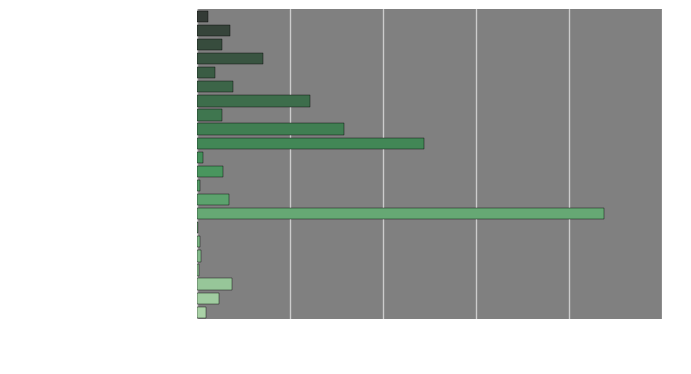

In [52]:
sns.countplot(y="language", data=admin_data, palette="Greens_d"); #spec'ing palette is optional

Okay, so no surprise: Englishes are top contenders: British, and then presumably American? We would want to consult the Wordbank documentation to verify that, if we were serious about this.

The other top languages aren't surprising: European(-ish) and Chinese languages. Great to see less-represented langauges like Kiswahili (aka, Swahili) in there, though!

A brief aside on good visualization practices: Anyone care to comment on my choice of color palette here? Hint: What does it imply about the kind of variable `language` is? How would we fix that?

Something MORE complex. Can we visualize:

    how vocab production changes with age
        in English-learning kids
        who are administered the words and sentences version of the CDI
    differently for boys and girls???

Hey, maybe a scatterplot, with `age` on the x-axis, `production` on the y-axis, and separately hued dots for boys and girls? Let's try that.

First, maybe it's worthwhile calling `admin_data.head()` to remind ourselves of the structure of our data so we know how to fit it into our plotting function, `.lmplot`.

In [53]:
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88
29822.0,Croatian,WG,16,Male,NaN,122,12
29823.0,Croatian,WG,9,Female,NaN,3,0
29824.0,Croatian,WG,12,Female,NaN,0,0
29825.0,Croatian,WG,12,Female,NaN,44,0


As I said, the `seaborn` function we'll use is called `.lmplot`. I don't know what `lm` is short for ('linear model' wouldn't quite make sense, as you'll see), but it is, in the words of the docs:

> intended as a convenient interface to fit regression models across conditional subsets of a dataset

In our case, we'll examine how `production` changes over `age` with fitted regression models, and the "conditional subsets" will be the different values `gender` can take (`male` and `female`). And the `data` we'll supply to `.lmplot` will be a `.query` of just the English-speaking, WS-administered rows.

Finally, you can tell `.lmplot` to display a scatterplot of your x variable (`age`) against your y variable (`gender`). To start, we'll just do that instead of displaying a fitted regression model.

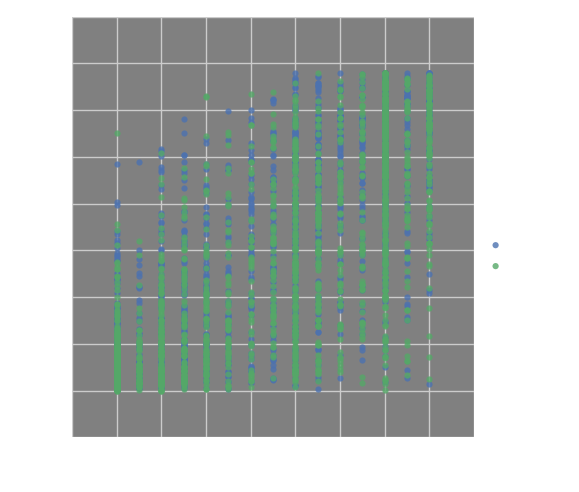

In [54]:
sns.lmplot(x='age', y='production', hue='gender', scatter=True, fit_reg=False,
            data=admin_data.query('form == "WS" & language == "English"'));

Oh, it's kind of hard to read that with all the dots laying on top of each other! Fortunately, `seaborn` makes it super easy to just 'jitter' the datapoints!

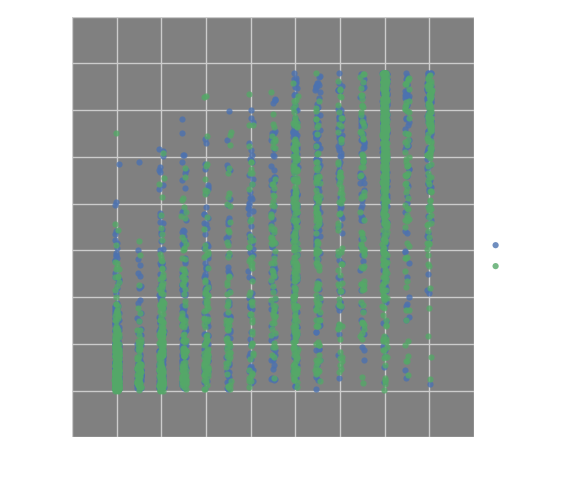

In [55]:
sns.lmplot(x='age',y='production', hue='gender', scatter=True, fit_reg=False,
           data=admin_data.query('form == "WS" & language == "English"'), x_jitter=0.1);

Hmm. Jitter didn't really help! Maybe let's just dispense with displaying individual data points, and instead display a fitted regression model?

You can tell `.lmplot` to fit all kinds of models: polynomials of various order, logistic regressions, and, maybe (most?) appropriate for our case, lowess regressions. Which basically just fits sequential subsets of your data to different linear regressions, to more smoothly model your data (vs having a single straight line).

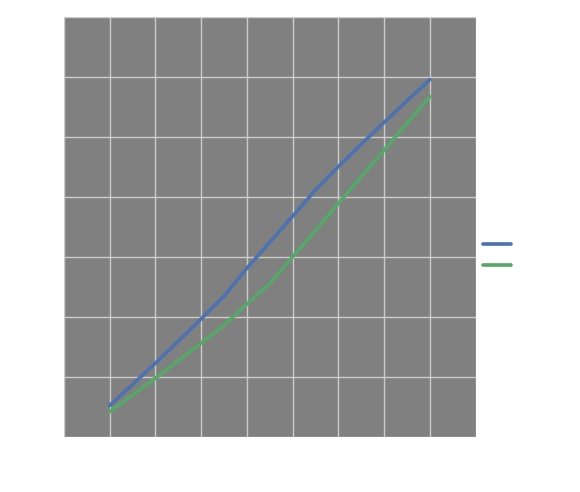

In [56]:
sns.lmplot(x='age',y='production',hue='gender', scatter=False, fit_reg=True, lowess=True,
            data=admin_data.query('form == "WS" & language == "English"'));

That's much better. Now we can clearly see that English-speaking female and male toddlers (~16 months) produce words and gestures at similar rates, but then girls produce more than boys for a while, and boys start to close the gap by 30 months.

A still more complex (!) visualization: make separate subplots for the different forms WG and WS!

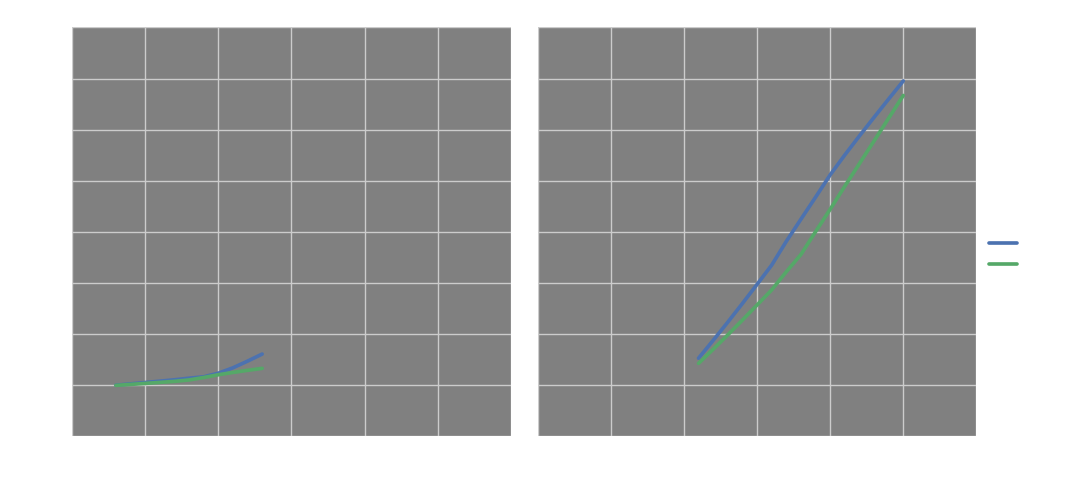

In [57]:
sns.lmplot(x='age',y='production',hue='gender', col='form', scatter=False, lowess=True,
            data=admin_data.query('language == "English"'));

So this now let's us see the WG and WS side-by-side. And we see that the gender gap in production development emerges actually earlier than the WS is administered, around 15-18 months!

You can make this even more bonkers, by specifying a `row` parameter in the plotting method, and then you've got a 2d *array* of plots. If we have time at the end, we'll make a group of plots like that....

One final note to make of `seaborn`: because the `seaborn` interface is designed so uniformly, trying out different visualizations is oftentimes just a matter of replacing the name of the function at the beginning! So it allows for rapid, painless (IMO!) testing of different visualizations.

**Questions about Seaborn? Any other suggestions for things to try to plot right now?** If we/I don't already know how to do it (very, very possible!), we might be able to figure it out in 5 seconds from the `seaborn` docs!

In [63]:
# Another plot???

In [64]:
# Or two? Check the time!!!

### Some statistical analysis in Python

[`scipy.stats`](https://docs.scipy.org/doc/scipy-0.18.1/reference/stats.html) and [`statsmodels`](http://statsmodels.sourceforge.net/) are the two Python stats packages I've used for basic stats analysis, like t-tests and ANOVA, chi-square, regression (linear, logistic, and more). If you really get into machine learning, you may want to check out [`scikit-learn`](http://scikit-learn.org/stable/index.html), which has functionality for random forests, support vector machines, clustering, and other more advanced techniques. (But we won't cover `scikit-learn` at all today.)

In [67]:
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88
29822.0,Croatian,WG,16,Male,NaN,122,12
29823.0,Croatian,WG,9,Female,NaN,3,0
29824.0,Croatian,WG,12,Female,NaN,0,0
29825.0,Croatian,WG,12,Female,NaN,44,0


#### Scipy.stats

Are comprehension and production abilities correlated? Without a doubt, but let's do a 'sanity check' and demonstrate the Pearson's R correlation function in `scipy.stats`.

Also, remember how for some forms (like the `WS`), comprehension was just stipulated to be equal to production? To accommodate that, let's just compute the comprehension~production correlation for the CDI administrations with the `WG` form.

And let's just do this for English CDI's.

In [58]:
import scipy.stats

comp = admin_data.query('(language=="English") & (form=="WG")')['comprehension']
prod = admin_data.query('(language=="English") & (form=="WG")')['production']

r, pval = scipy.stats.pearsonr(x=comp,y=prod)

print(r, pval, sep=', ')

0.625969864073, 6.82129090846e-267


The first value is our r statistic -- moderately sized! -- and the second is our p-value -- miniscule (read that as 6.8 * 10<sup>-267</sup>).

Before we can report this in a conventional format, we need our degrees of freedom. What are those for Pearon's r? df = number of pairs - 2. We already know from the `.describe` at the beginning of the tutorial that there are no missing values in comprehension or production so just checking the length of one column/variable will tell us the number of pairs.

In [78]:
df = len(comp) - 2
df

2450

English-exposed children's comprehension and production, as measured by word and gesture CDI's, are substantially correlated, *r* (2450) = 0.63, *p* < 10<sup>-266</sup>.

Let's compute a one-way chi-square for the counts of the different languages in the `admin_data`, just for fun (I say fun because I think it's pretty clear how it'll turn out if you remember the `.countplot` from above!)

In [59]:
language_counts = admin_data['language'].value_counts()
language_counts

English (British)         21919
Norwegian                 12225
English                    7902
Danish                     6112
Turkish                    3537
Mandarin                   1938
Spanish                    1872
Russian                    1805
Slovak                     1715
Italian                    1400
Swedish                    1367
French (Quebec)            1364
German                     1181
Cantonese                   987
Croatian                    627
Czech                       493
Hebrew                      314
Kigiriama                   209
Cypriot Greek               176
British Sign Language       161
Kiswahili                   128
American Sign Language       59
Name: language, dtype: int64

In [60]:
scipy.stats.chisquare(language_counts)

Power_divergenceResult(statistic=181736.88647375209, pvalue=0.0)

Why is our p-value just printing as 0.0? Because it was so small -- smaller even than the *p* < 10<sup>-266</sup> from above. I grant that that's maybe not particularly confidence-inspiring, but I think this will be an uncommon occurrence for the data we are using.

What's our df? Number of categories - 1.

In [78]:
df = len(language_counts) - 1
df

21

So yes. *$\chi$<sup>2</sup> (21)* = 181736, *p*<0.0. (In fact, we know it's less than *p* < 10<sup>-266</sup>.)

Let's try one more test from `scipy.stats`. I think a pretty natural question to ask is whether `mom_ed` differs by `language` background. Those are both categorical variables, so we can make a contingency table (aka cross tabs) to see the frequencies of different combinations of `mom_ed` and `language`. Then, we'll do a chi-square test of independence.

In [80]:
lang_mom_ed_crosstab = pd.crosstab(admin_data['language'],admin_data['mom_ed'])
lang_mom_ed_crosstab

mom_ed,College,Graduate,None,Primary,Secondary,Some College,Some Graduate,Some Secondary
language,,,,,,,,
British Sign Language,25,34,0,17,85,0,0,0
Czech,29,85,0,14,78,62,58,115
Danish,1051,480,0,242,172,1695,0,0
English,1139,720,0,10,668,866,199,190
English (British),2365,1450,1733,3341,2886,1214,0,8571
German,402,0,0,109,329,0,0,323
Hebrew,40,13,0,1,130,90,14,25
Norwegian,6093,3344,0,196,2548,0,0,0
Spanish,670,0,37,149,573,0,0,417


First, notice that we lost some of the languages, like Mandarin and Cantonese. That's because we didn't have maternal education levels for those languages! (You can verify that by running, e.g., `admin_data.query('language=="Mandarin"')['mom_ed'].isnull().all()`)

Even with those gone, it's still a lot to look at, but we sort of do see some variation in maternal education levels across language backgrounds. Hearing, northern European ((British) English, Norwegian, Danish, German) moms seem to be well-educated, in contrast to, for example, BSL and Czech-using mothers. That makes some sense.

What's interesting, though, is the 0's we see in certain places where we should expect to see at least a *few* counts. For example, there are *no* German-speaking mothers with grad-degrees? That seems off! I suspect this is due to how maternal ed was assessed in whatever study the German data come from. Obviously, again, this is the sort of thing you'd want to dig into if you were doing a serious project here. But we are not!

But, again, let's verify that there is in fact some relationship between maternal ed and language background with a chi-square test of independence. So, back to `scipy.stats`:

In [81]:
scipy.stats.chi2_contingency(lang_mom_ed_crosstab)

(31641.432721810474,
 0.0,
 56,
 array([[  4.21769519e+01,   2.18703240e+01,   6.31904561e+00,
           1.45623656e+01,   2.66649445e+01,   1.40197131e+01,
           9.67492294e-01,   3.44191631e+01],
        [  1.15528173e+02,   5.99056700e+01,   1.73086902e+01,
           3.98882187e+01,   7.30387609e+01,   3.84018227e+01,
           2.65008759e+00,   9.42785773e+01],
        [  9.53565869e+02,   4.94459498e+02,   1.42865379e+02,
           3.29236091e+02,   6.02859614e+02,   3.16967426e+02,
           2.18737388e+01,   7.78172384e+02],
        [  9.93385103e+02,   5.15107258e+02,   1.48831186e+02,
           3.42984411e+02,   6.28033971e+02,   3.30203428e+02,
           2.27871477e+01,   8.10667495e+02],
        [  5.64804399e+03,   2.92872164e+03,   8.46202630e+02,
           1.95009069e+03,   3.57078387e+03,   1.87742244e+03,
           1.29559838e+02,   4.60917489e+03],
        [  3.04669535e+02,   1.57982527e+02,   4.56462736e+01,
           1.05192740e+02,   1.92616959e+02, 

A lot of output there! From the [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html), this function returns:

> - chi2 : float. The test statistic.
- p : float. The p-value of the test
- dof : int. Degrees of freedom
- expected : ndarray, same shape as observed. The expected frequencies, based on the marginal sums of the table.

So, to report this test in a conventional manner:

> A chi-squared test of independence revealed that maternal education was not independent of maternal language background, *$\chi$<sup>2</sup> (56)* = 31641, *p*<0.0.

So yes, maternal ed differs by langauge backgorund.

Once more, if we were really serious about this, we might inquire about, for example, what cells contributed to departure from independence (with, for example, standardized residuals for each cell).

#### Statsmodels

We won't spend as much time on `statsmodels`. Let's just look a simple ordinary least-squares regression. Maybe we want to build an OLS regression predicting production scores from child gender and child age?

In [82]:
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88
29822.0,Croatian,WG,16,Male,NaN,122,12
29823.0,Croatian,WG,9,Female,NaN,3,0
29824.0,Croatian,WG,12,Female,NaN,0,0
29825.0,Croatian,WG,12,Female,NaN,44,0


In [61]:
import statsmodels.formula.api as smf

# Let's just consider English speaking kids for the WG form
eng_wg_admin_data = admin_data.query('form=="WG" & language=="English"')

# Fit regression model. Use R-style formulas to specify model.
# we can just put gender in without, e.g., dummy coding, because gender is binary in these data
results = smf.ols('production ~ gender + age', data=eng_wg_admin_data).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             production   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     332.5
Date:                Thu, 12 Jan 2017   Prob (F-statistic):          3.12e-128
Time:                        11:49:08   Log-Likelihood:                -12294.
No. Observations:                2409   AIC:                         2.459e+04
Df Residuals:                    2406   BIC:                         2.461e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        -81.9934      4.754    -17.

Let's look at that. Pretty similar to what you'd get in SPSS or R. See the R<sup>2</sup>, the overall p-value, the coefficient estimates and confidence intervals for our different predictors, etc.

As I said, you can also do logistic regression. [Here's](http://blog.yhat.com/posts/logistic-regression-python-rodeo.html) an excellent blog post about using `statsmodels` to run a logistic regression. Logistic regression doesn't really make sense for our data, so we won't go there, but if you look at the `statsmodels` docs, you'll see that the code pattern for running a logistic regression is similar to that of running an OLS regression.

You can also do mixed effects models in `statsmodels`, but my superficial understanding is that R's packages for mixed effects models are superior. Your mileage may vary.

## Replicating a Wordbank analysis
### Gender Differences in Vocabulary Development

We will be replicating [this analysis](https://mikabr.github.io/demo-vocab/gender.html) on gender differences in vocab development across the langauges in Wordbank. They did the analysis in R, but we'll of course do it Python! Note, this will get a little hairy!

Their analysis is itself a replication of:

> Eriksson, M., Marschik, P. B., Tulviste, T., Almgren, M., Pérez Pereira, M., Wehberg, S., … Gallego, C. (2012). *Differences between girls and boys in emerging language skills: Evidence from 10 language communities. British Journal of Developmental Psychology 30*, 326–343.

We already have the administration table loaded in, but we now want to subset it for administrations of the Words & Sentences form that have gender coded.

There's a couple different ways to get this subset, but probably the most transparent is to use a multi-part `.query`!

In [95]:
ws_genderCoded_admin_data = admin_data.query('(form=="WS") \
                                            & (gender=="Male" | gender=="Female")'
                                            )
ws_genderCoded_admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
30071.0,Croatian,WS,30,Female,NaN,462,462
30072.0,Croatian,WS,29,Female,NaN,527,527
30073.0,Croatian,WS,27,Female,NaN,400,400
30074.0,Croatian,WS,24,Female,NaN,448,448
30075.0,Croatian,WS,24,Female,NaN,315,315


In [96]:
# an alternative, probably more obscure way of getting the same subset
"""
ws_genderCoded_admin_data = admin_data.query('form=="WS"')\
                                      .dropna(axis=0, #drop ROWS that have missing values on...
                                             subset=['gender'] # the gender column!
                                             )
ws_genderCoded_admin_data.head()
"""
pass

Let's double-check that we got the data we wanted. What forms do we have?

In [97]:
ws_genderCoded_admin_data['form'].unique()

array(['WS'], dtype=object)

And do we have any missing values in `gender` now?

In [98]:
pd.isnull(ws_genderCoded_admin_data['gender']).any()

False

Great. Now we get item information to find the number of items on each language’s form.

The item information that we want actually can't be conveniently downloaded directly from the Wordbank website (blargh). I got it through the wordbank R package and then saved it to a csv in our repo's wordbank folder. (See my R script [here](wordbank-data/getting_item_data.r) for how I did that.)

In [101]:
filepath = 'wordbank-data/all_languages_and_forms_item_data.csv'

all_languages_and_forms_item_data = pd.read_csv(filepath)
all_languages_and_forms_item_data.head()

,Unnamed: 0,item_id,definition,language,form,type,category,lexical_category,lexical_class,uni_lemma,complexity_category,num_item_id
0,1,item_81,gristi,Croatian,WG,word,action_words,predicates,verbs,bite,NaN,81
1,2,item_264,puhati,Croatian,WG,word,action_words,predicates,verbs,blow,NaN,264
2,3,item_269,razbiti,Croatian,WG,word,action_words,predicates,verbs,break,NaN,269
3,4,item_64,donijeti,Croatian,WG,word,action_words,predicates,verbs,bring,NaN,64
4,5,item_153,kupiti,Croatian,WG,word,action_words,predicates,verbs,buy,NaN,153


Drop that column all the way on the left! (Sometimes you'll find reading/writing datatables gets you useless columns like that that you really don't want.)

In [102]:
all_languages_and_forms_item_data.drop(labels='Unnamed: 0',axis=1,inplace=True)
all_languages_and_forms_item_data.head()

,item_id,definition,language,form,type,category,lexical_category,lexical_class,uni_lemma,complexity_category,num_item_id
0,item_81,gristi,Croatian,WG,word,action_words,predicates,verbs,bite,NaN,81
1,item_264,puhati,Croatian,WG,word,action_words,predicates,verbs,blow,NaN,264
2,item_269,razbiti,Croatian,WG,word,action_words,predicates,verbs,break,NaN,269
3,item_64,donijeti,Croatian,WG,word,action_words,predicates,verbs,bring,NaN,64
4,item_153,kupiti,Croatian,WG,word,action_words,predicates,verbs,buy,NaN,153


To repeat, what we're interested in is the number of word-like items on each language’s WS form.

Strap in...

In [138]:
# talk through this and then run it
ws_word_item_data = all_languages_and_forms_item_data.query('form=="WS" & type=="word"')\
                                                     .groupby('language')\
                                                     .max()\
                                                     ['num_item_id']
ws_word_item_data

language
Cantonese          804
Croatian           717
Cypriot Greek      818
Czech              553
Danish             725
English            680
French (Quebec)    664
German             588
Hebrew             622
Italian            670
Kigiriama          705
Kiswahili          705
Mandarin           799
Norwegian          731
Russian            728
Slovak             610
Spanish            680
Swedish            710
Turkish            711
Name: num_item_id, dtype: int64

Whew. That was a really verbose command! What it got us was the number of word-like items on each language's WS form. Questions about how we did that?

Next up: normalize each administration's productive vocabulary size as a proportion of *the number of word-like item's on that language's WS form*. For example, if a parent indicates that their child says 100 words on a form, and there are 200 words on that form, the normalized productive vocab size would be 0.5!

So first, let's merge the `ws_word_item_data` into the `ws_genderCoded_admin_data` dataframe. Merging/joining is another critical pandas functionality!

We'll attempt to join the two objects on their common 'language' column. but first, we'll have to 'munge' `ws_word_item_data` a little bit. The two issues:
- `ws_word_item_data` is a Series, and you can't directly merge Series with DataFrames, so we first have to convert `ws_word_item_data` to a DataFrame with `.to_frame()`
- The above will put `language` on the index, but we don't want that -- we want it to be an ordinary column, so we'll use the `.reset_index` method to change `language` from the index to an ordinary column.

Like so:

In [104]:
ws_word_item_data_df = ws_word_item_data.to_frame().reset_index()
ws_word_item_data_df

,language,num_item_id
0,Cantonese,804
1,Croatian,717
2,Cypriot Greek,818
3,Czech,553
4,Danish,725
5,English,680
6,French (Quebec),664
7,German,588
8,Hebrew,622
9,Italian,670


And now we can merge `ws_genderCoded_admin_data` with `ws_word_item_data_df`.

To be honest, reasoning about merging takes a fair amount of thought/practice -- whenever I do it, I have to recheck the docs and do a fair amount of testing. And I'm going to sort of gloss over the details of how exactly this merge works, and how it differs from alternative merges....

Fortunately, the merge that works for us is simple:

In [108]:
ws_genderCoded_admin_data = ws_genderCoded_admin_data.merge(ws_word_item_data_df)#, how='left')
ws_genderCoded_admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production,num_item_id
0,Croatian,WS,30,Female,NaN,462,462,717
1,Croatian,WS,29,Female,NaN,527,527,717
2,Croatian,WS,27,Female,NaN,400,400,717
3,Croatian,WS,24,Female,NaN,448,448,717
4,Croatian,WS,24,Female,NaN,315,315,717


Okay, so now you can see that every administration in a particular language has the `num_item_id` column at the end indicating how many items are on that language's WS form! Now, we can compute, for every row, `production` divided by `num_item_id`, to get the percentage of items on a particular language's WS form that a kid is actually producing according to the CDI administration.

In [109]:
ws_genderCoded_admin_data['normalizedProd'] = ws_genderCoded_admin_data['production'] \
                                            / ws_genderCoded_admin_data['num_item_id']
ws_genderCoded_admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production,num_item_id,normalizedProd
0,Croatian,WS,30,Female,NaN,462,462,717,0.644351
1,Croatian,WS,29,Female,NaN,527,527,717,0.735007
2,Croatian,WS,27,Female,NaN,400,400,717,0.557880
3,Croatian,WS,24,Female,NaN,448,448,717,0.624826
4,Croatian,WS,24,Female,NaN,315,315,717,0.439331


And now we want the median `normalizedProd` for every language, sex/gender, and age.

Let's do this in two steps:

In [139]:
median_groupby = ws_genderCoded_admin_data.groupby(by=['language','gender','age'])\
                                          .median()
median_groupby.head()

comprehension  production  num_item_id  normalizedProd
language  gender age                                                        
Cantonese Female 16            28.0        28.0        804.0        0.034826
                 17            48.5        48.5        804.0        0.060323
                 18           101.0       101.0        804.0        0.125622
                 19            74.5        74.5        804.0        0.092662
                 20           148.0       148.0        804.0        0.184080

We just want the normalized productsion. And, we don't want that multi-index on the left, so let's reset the index:

In [140]:
median_probs = median_groupby['normalizedProd'].reset_index()

median_prods.head()

,language,gender,age,normalizedProd
0,Cantonese,Female,16,0.034826
1,Cantonese,Female,17,0.060323
2,Cantonese,Female,18,0.125622
3,Cantonese,Female,19,0.092662
4,Cantonese,Female,20,0.184080


So that table tells us that, e.g., Cantonese-exposed 16 month old girls are producing 3% of the words on the WS CDI!

Okay, and now we can try to visualize this with Seaborn, and we should basically get what the wordbank team made with R's ggplot2, which you can see if you run the next cell.

(**Warning! The image in the next cell is very bright!**)

![](wordbank-data/gender_diffs_by_langauge.png)

This next chunk is somewhat complex. But what we're basically going to do is first set up an array of place-holders for plots like the above. We'll tell Seaborn what data will go into that array, how the subplots will carve up that data (by language), etc....

Then, we'll `.map()` to our array a seaborn plotting function (here, `.pointplot()`), and also supply the arguments that `.pointplot()` needs, like the x-, y- and hue-variables.

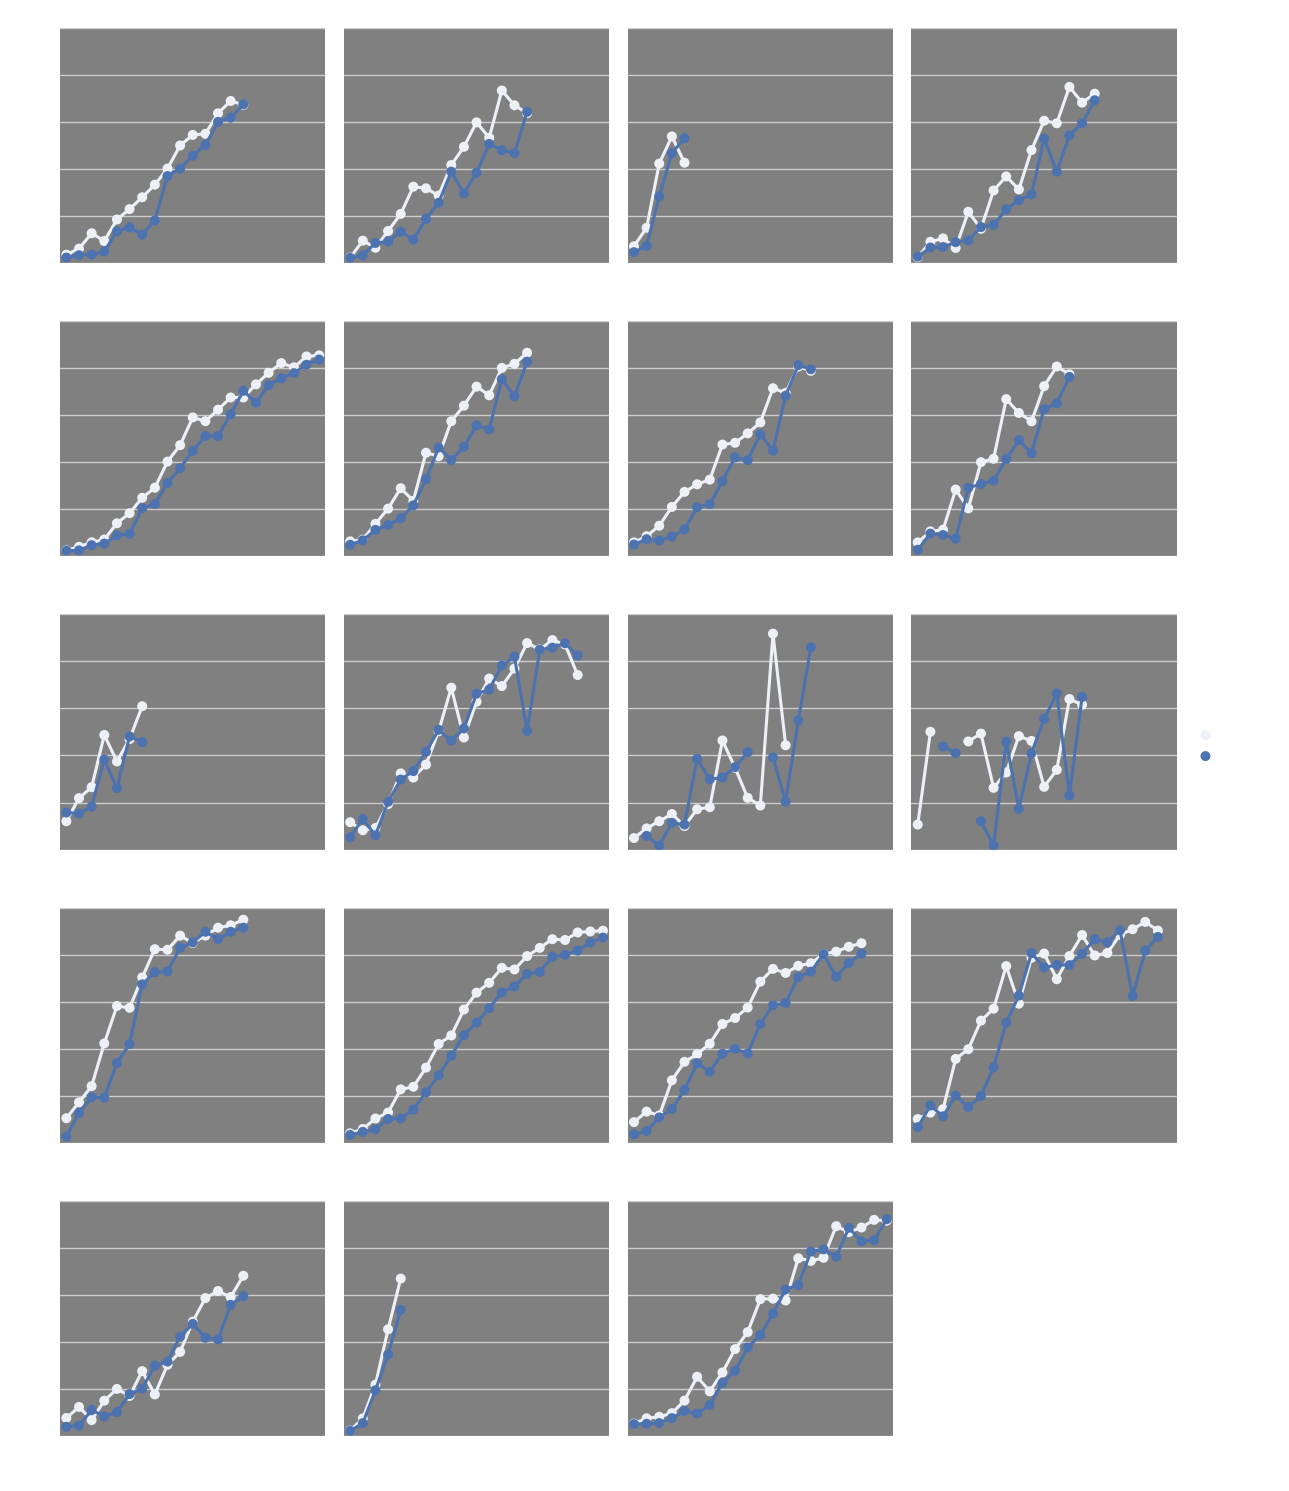

In [122]:
g = sns.FacetGrid(data=median_prods, col="language", col_wrap=4, size=3, ylim=(0, 1));

"""
`g` is now a `FacetGrid` object -- basically just an array of place holders on which we'll put
our plots of actual data! To put those data onto that array, we 'map' to `g` a seaborn plotting
function, and also supply the arguments -- like the x-, y- and hue-variables -- that *that* 
plotting function needs.
"""

"""
scale just makes the points and lines on the resulting plot smaller/more legible
`.add legend()` adds the gender legend on the right!
"""
g.map(sns.pointplot, "age", "normalizedProd", "gender", scale=.7)\
         .add_legend();

Ta-da. That looks pretty much like the Wordbank group's analysis/visualization (with an amount of code that, believe it or not, compares favorably to the R script they used, I think).

We have more plots than the Wordbank group because additional data made it into Wordbank after they made their plots. And actually, the erraticness of some of our plots, like for Kiswahili should give us pause -- that is likely due to the paucity of data we have for those languages.

(Again, we could further tweak that so, e.g., the ages on the x-axis aren't running together.)

Whew!

Any questions on what we *just* did? (After some closing comments, I'll open everything up to wider discussion)

## A few closing notes...

1. For future reference after today....
   1. [Here's](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) a nifty cheatsheet of the pandas basics.
   2. And here's ["10 minutes to pandas"](http://pandas.pydata.org/pandas-docs/stable/10min.html#), a 'quick' tutorial that makes for a nice reference. (Some of this tutorial is taken from that.)
   3. And you can always feel free to contact me. I love this stuff!
2. If you took stats with Eric Lundquist last semester and are curious how those homeworks would be analyzed in Python, contact me -- I did most of them in Jupyter Notebooks (waaaaay shorter and simpler than this one!).
3. If you're interested in (re)analyzing existing datasets like Wordbank, a bunch of psycholinguistic datasets can be found on ASHA's website: [Research Databases and Other Online Tools](http://www.asha.org/research/researcher-tools/databases/). (WordNet, a hand-crafted ontology, on that list, has a Python interface through the `nltk` library!)

# Questions or comments???